In [2]:
print("Building a Decision Tree Model to classify a/c to words and characters present in spam_base dataset")

Building a Decision Tree Model to classify a/c to words and characters present in spam_base dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("spambase.csv")

In [5]:
print(dataset.head(5))

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [6]:
dataset.shape

(4601, 58)

In [7]:
# dataset has 58 features / attributes and 4601 tuples

In [9]:
# Identifying the type of values in dataset: int , float , object(string)
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Number of categorical datatype features: ", len(object_cols))

int_ = (dataset.dtypes == 'int')
int_cols = list(int_[int_].index)
print("Number of integer datatype features: ", len(int_cols))

float_ = (dataset.dtypes == 'float')
float_cols = list(float_[float_].index)
print("Number of float datatype features: ", len(float_cols))

Number of categorical datatype features:  0
Number of integer datatype features:  3
Number of float datatype features:  55


In [10]:
dataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [14]:
# So, there is no null values in the dataset --> also no categorical values:
# so, no need to clean the data or encode the any feature

# After analyzing the dataset, the emails are evaluated as spam / not-spam 
# on the basis of frequency of certain words and special characters in the dataset

In [24]:
# Selecting all the features excluding "spam" as input instances
X = dataset.drop(columns='spam')
print(X.shape)

Y = dataset[['spam']]
print(Y.shape)

(4601, 57)
(4601, 1)


In [25]:
# train and test split
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(
    X , Y , train_size=0.6 , test_size=0.4 , random_state=60
)

In [26]:
# Using decision tree classifier -- model training
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)

classifier.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:
# predicting on test data
Y_predicted = classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score , classification_report

# 2.a
# Evaluate accuracy
accuracy = accuracy_score(Y_test , Y_predicted)
print(f"Accuracy: {accuracy}")

# Detailed Classification report
print(classification_report(Y_test , Y_predicted))

Accuracy: 0.9071156979902227
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1150
           1       0.87      0.89      0.88       691

    accuracy                           0.91      1841
   macro avg       0.90      0.90      0.90      1841
weighted avg       0.91      0.91      0.91      1841



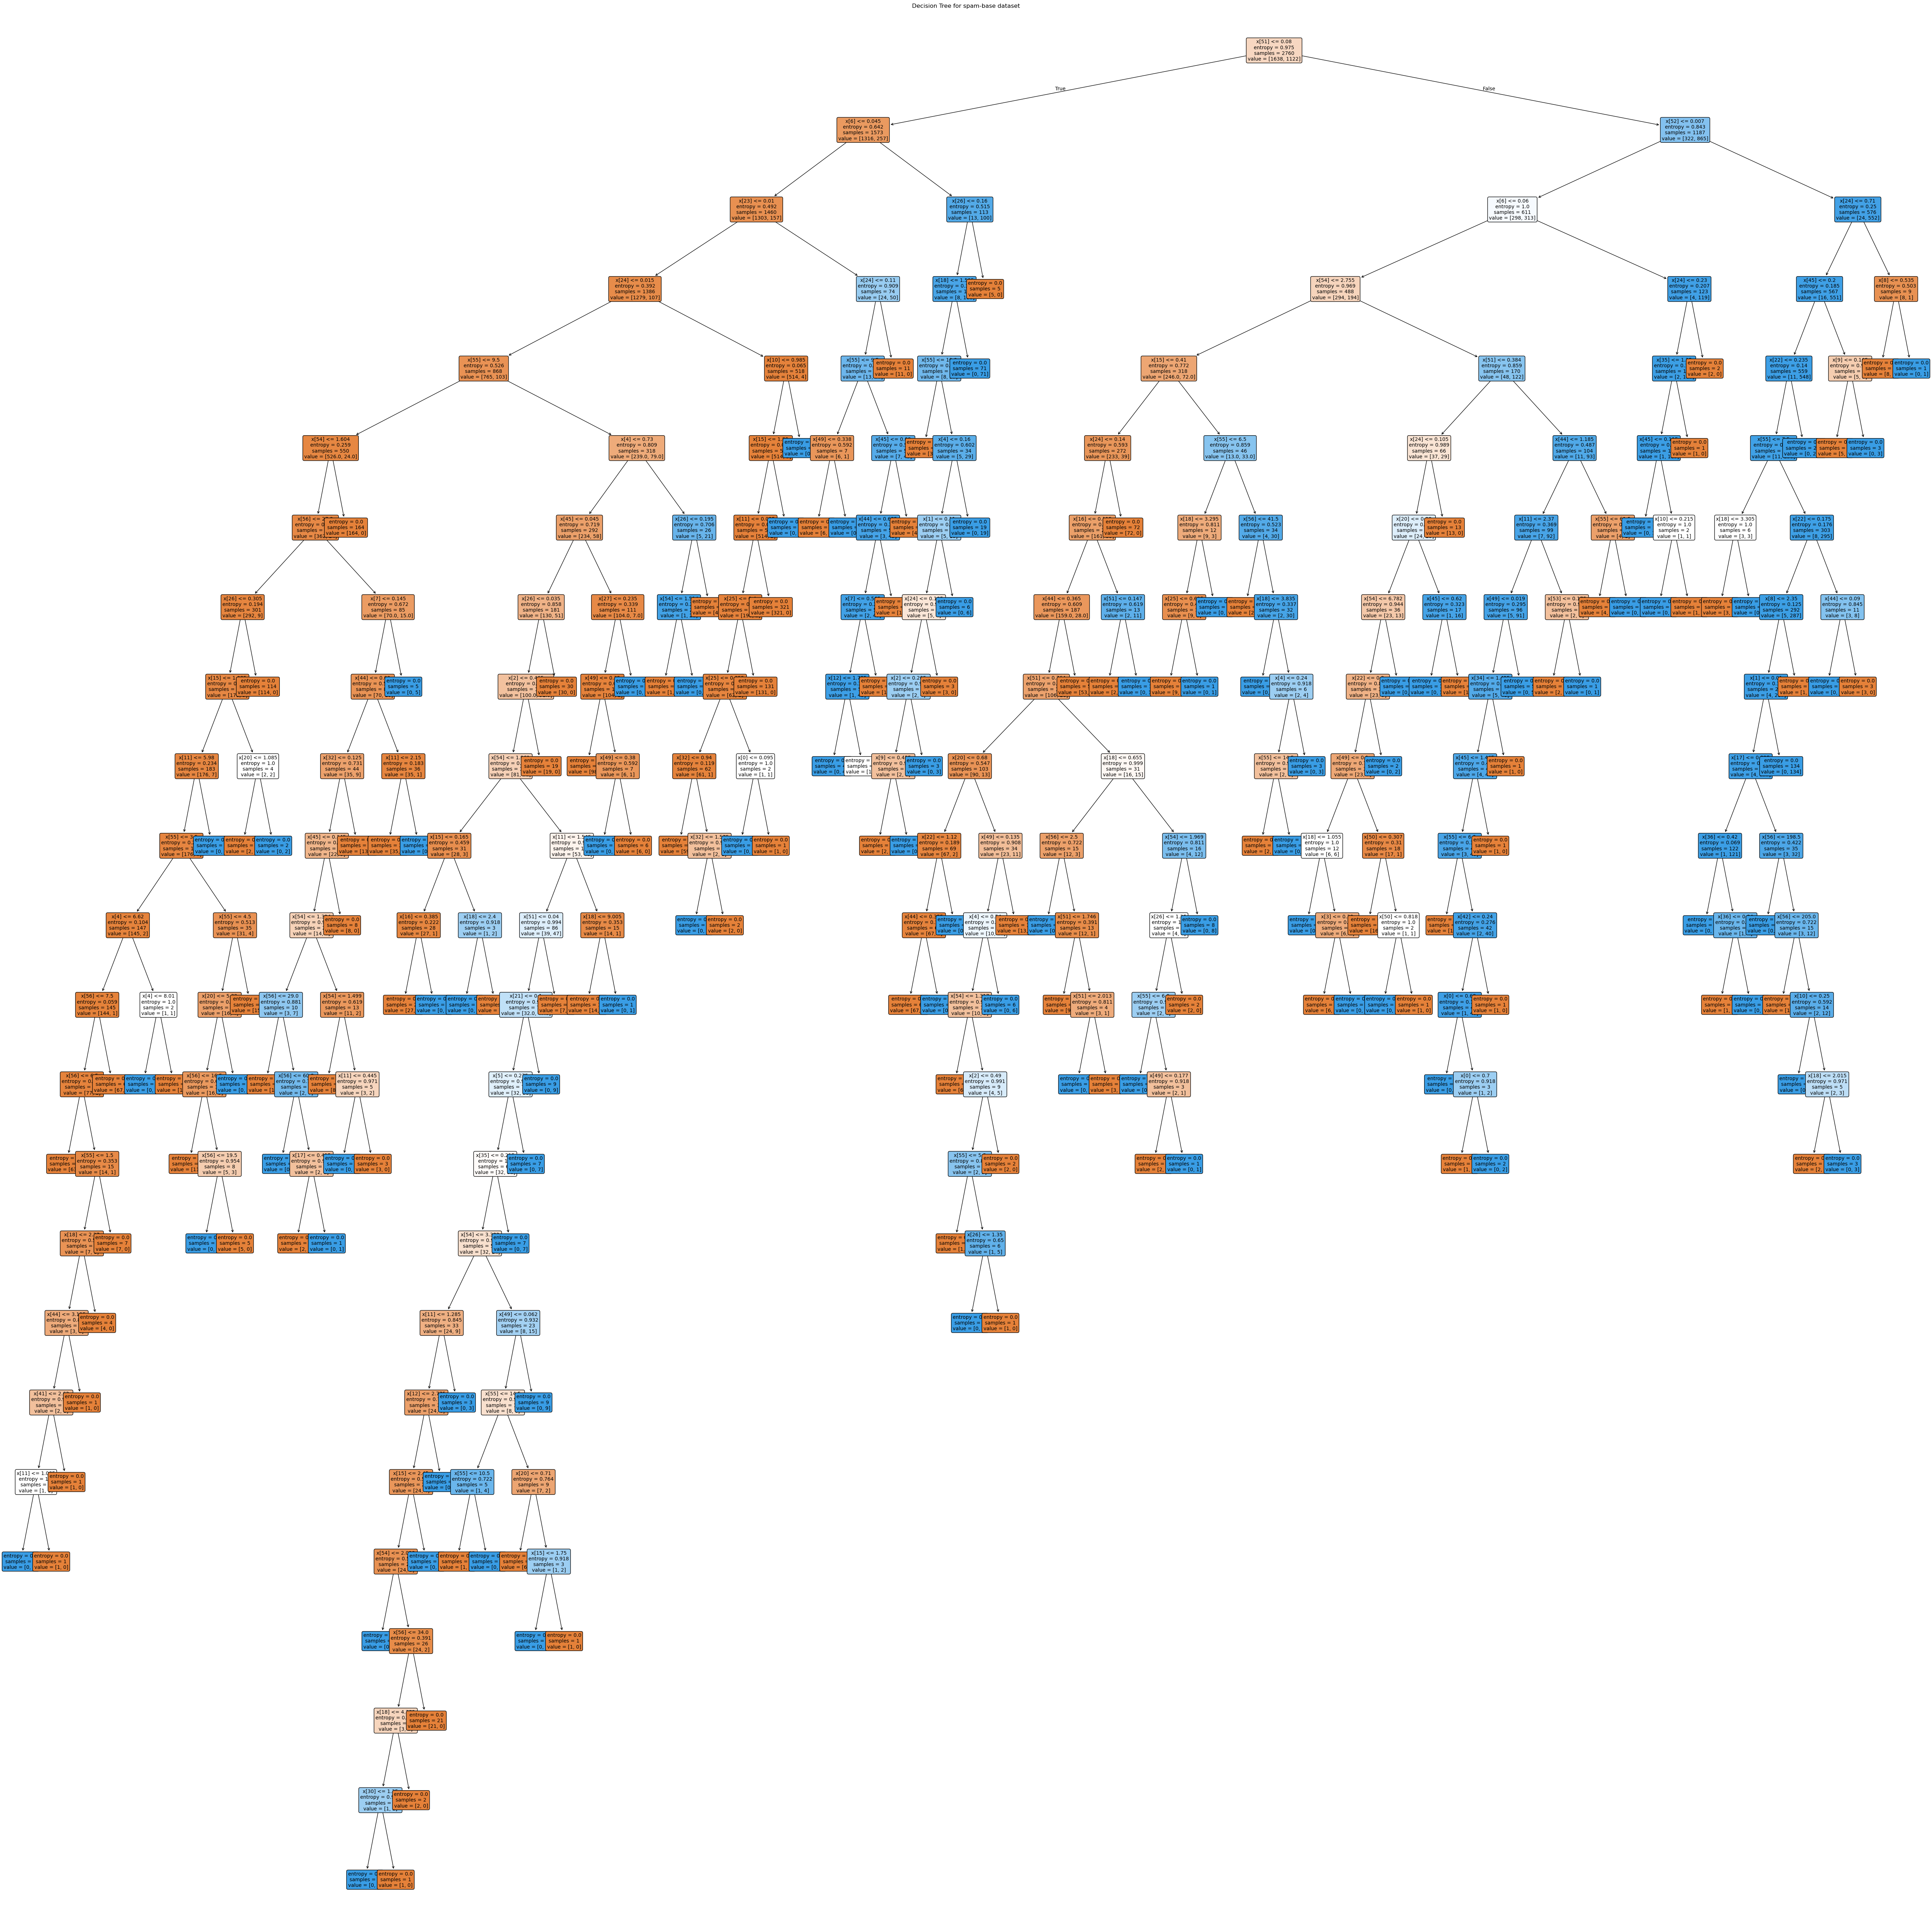

In [34]:
# 2.b
from sklearn import tree
plt.figure(figsize=(70,70))
tree.plot_tree(
    classifier,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for spam-base dataset")
plt.show()